In [178]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
from datetime import datetime

In [18]:
def fetch_git_data(url):
    pages = []
    res=requests.get(url,headers={'Authorization': 'token ' + 'eb733a5bd2ed051abd83a00052194857fb33c613', 'Accept': 'application/vnd.github.squirrel-girl-preview+json'})
    data=res.json()
    pages.append(data)
    #counter = 0
    #print (res.links.keys())
    while 'next' in res.links.keys():
        #counter += 1
        res = requests.get(res.links['next']['url'], headers={'Authorization': 'token ' + 'eb733a5bd2ed051abd83a00052194857fb33c613', 'Accept': 'application/vnd.github.squirrel-girl-preview+json'})
        pages.append(res.json())
    #print(len(pages))
    return pages

# User 

In [19]:
#url = "https://api.github.com/search/users?q=repos:%3E5+followers:%3E1000"
url = "https://api.github.com/search/users?q=followers:%3E1000&per_page=100"
data = fetch_git_data(url)
print ('done')

done


In [20]:
len(data)

10

In [21]:
df = pd.DataFrame(data)
df

,incomplete_results,items,total_count
0,False,"[{'login': 'torvalds', 'id': 1024025, 'node_id...",2123
1,False,"[{'login': 'sorrycc', 'id': 35128, 'node_id': ...",2123
2,False,"[{'login': 'ageron', 'id': 76661, 'node_id': '...",2123
3,False,"[{'login': 'soffes', 'id': 52870, 'node_id': '...",2123
4,False,"[{'login': 'mattdesl', 'id': 1383811, 'node_id...",2123
5,False,"[{'login': 'nostra13', 'id': 1223348, 'node_id...",2123
6,False,"[{'login': 'dlew', 'id': 514850, 'node_id': 'M...",2123
7,False,"[{'login': 'mixu', 'id': 398530, 'node_id': 'M...",2123
8,False,"[{'login': 'stubbornella', 'id': 39398, 'node_...",2123
9,False,"[{'login': 'chjj', 'id': 470564, 'node_id': 'M...",2123


In [22]:
def get_user(df):
    users = pd.DataFrame()
    for y in df['items']:
        x = list(y)
        users = users.append(x, ignore_index=True)
    return users

In [23]:
users = get_user(df)

In [68]:
users.columns

Index(['avatar_url', 'events_url', 'followers_url', 'following_url',
       'gists_url', 'gravatar_id', 'html_url', 'id', 'login', 'node_id',
       'organizations_url', 'received_events_url', 'repos_url', 'score',
       'site_admin', 'starred_url', 'subscriptions_url', 'type', 'url'],
      dtype='object')

In [25]:
login_list = list(users.login)

In [27]:
def fetch_git_data_user(url):
    pages = []
    res=requests.get(url,headers={'Authorization': 'token ' + 'eb733a5bd2ed051abd83a00052194857fb33c613'})
    data=res.json()
    pages.append(data)
    #counter = 0
    #print (res.links.keys())
    while 'next' in res.links.keys():
        #counter += 1
        res = requests.get(res.links['next']['url'], headers={'Authorization': 'token ' + 'eb733a5bd2ed051abd83a00052194857fb33c613'})
        pages.append(res.json())
    #print(len(pages))
    return pages

In [28]:
full_user = []
for x in login_list:
    url = "https://api.github.com/users/"+str(x)
    full_user.append(fetch_git_data_user(url))

In [29]:
def get_user(result):
    user_all = pd.DataFrame()
    for x in result:
        user_all = user_all.append(x, ignore_index=True)
    return user_all

In [235]:
full_user_detail = get_user(full_user)

In [239]:
full_user_detail.columns

Index(['avatar_url', 'bio', 'blog', 'company', 'created_at', 'email',
       'events_url', 'followers', 'followers_url', 'following',
       'following_url', 'gists_url', 'gravatar_id', 'hireable', 'html_url',
       'id', 'location', 'login', 'name', 'node_id', 'organizations_url',
       'public_gists', 'public_repos', 'received_events_url', 'repos_url',
       'site_admin', 'starred_url', 'subscriptions_url', 'type', 'updated_at',
       'url'],
      dtype='object')

In [60]:
z = full_user_detail[['login','followers','following','public_repos','public_gists']]

In [61]:
full_user_detail.columns

Index(['avatar_url', 'bio', 'blog', 'company', 'created_at', 'email',
       'events_url', 'followers', 'followers_url', 'following',
       'following_url', 'gists_url', 'gravatar_id', 'hireable', 'html_url',
       'id', 'location', 'login', 'name', 'node_id', 'organizations_url',
       'public_gists', 'public_repos', 'received_events_url', 'repos_url',
       'site_admin', 'starred_url', 'subscriptions_url', 'type', 'updated_at',
       'url'],
      dtype='object')

In [62]:
z.describe()

,followers,following,public_repos,public_gists
count,1000.00000,1000.000000,1000.000000,1000.0000
mean,4697.00400,1268.558000,110.865000,58.5910
std,6113.90232,14302.180571,213.011626,161.7034
min,1786.00000,0.000000,0.000000,0.0000
25%,2189.75000,2.000000,28.000000,2.0000
50%,2942.50000,18.000000,61.000000,15.0000
75%,4713.25000,64.250000,129.250000,53.0000
max,104103.00000,303963.000000,5208.000000,2585.0000


## Sorting Users by number of followers

In [135]:
sorted_user_by_follower = full_user_detail.sort_values('followers', ascending=False)

In [136]:
sorted_user_by_follower.head()

,avatar_url,bio,blog,company,created_at,email,events_url,followers,followers_url,following,...,public_gists,public_repos,received_events_url,repos_url,site_admin,starred_url,subscriptions_url,type,updated_at,url
0,https://avatars0.githubusercontent.com/u/10240...,None,,Linux Foundation,2011-09-03T15:26:22Z,None,https://api.github.com/users/torvalds/events{/...,104103,https://api.github.com/users/torvalds/followers,0,...,0,6,https://api.github.com/users/torvalds/received...,https://api.github.com/users/torvalds/repos,False,https://api.github.com/users/torvalds/starred{...,https://api.github.com/users/torvalds/subscrip...,User,2019-12-18T19:21:25Z,https://api.github.com/users/torvalds
1,https://avatars0.githubusercontent.com/u/90543...,None,https://twitter.com/ruanyf,None,2011-07-10T01:07:17Z,yifeng.ruan@gmail.com,https://api.github.com/users/ruanyf/events{/pr...,57753,https://api.github.com/users/ruanyf/followers,0,...,26,62,https://api.github.com/users/ruanyf/received_e...,https://api.github.com/users/ruanyf/repos,False,https://api.github.com/users/ruanyf/starred{/o...,https://api.github.com/users/ruanyf/subscriptions,User,2019-12-19T06:37:42Z,https://api.github.com/users/ruanyf
2,https://avatars0.githubusercontent.com/u/66577...,None,http://jakewharton.com,"Google, Inc.",2009-03-24T16:09:53Z,jakewharton@gmail.com,https://api.github.com/users/JakeWharton/event...,55774,https://api.github.com/users/JakeWharton/follo...,12,...,54,100,https://api.github.com/users/JakeWharton/recei...,https://api.github.com/users/JakeWharton/repos,False,https://api.github.com/users/JakeWharton/starr...,https://api.github.com/users/JakeWharton/subsc...,User,2019-12-09T13:37:20Z,https://api.github.com/users/JakeWharton
3,https://avatars1.githubusercontent.com/u/49955...,"Creator of @vuejs, previously @meteor & @google",http://evanyou.me,None,2010-11-28T01:05:40Z,None,https://api.github.com/users/yyx990803/events{...,53506,https://api.github.com/users/yyx990803/followers,93,...,65,153,https://api.github.com/users/yyx990803/receive...,https://api.github.com/users/yyx990803/repos,False,https://api.github.com/users/yyx990803/starred...,https://api.github.com/users/yyx990803/subscri...,User,2019-12-20T19:45:43Z,https://api.github.com/users/yyx990803
4,https://avatars0.githubusercontent.com/u/81043...,Working on @reactjs. Co-author of Redux and Cr...,http://twitter.com/dan_abramov,@facebook,2011-05-25T18:18:31Z,dan.abramov@me.com,https://api.github.com/users/gaearon/events{/p...,50920,https://api.github.com/users/gaearon/followers,171,...,70,237,https://api.github.com/users/gaearon/received_...,https://api.github.com/users/gaearon/repos,False,https://api.github.com/users/gaearon/starred{/...,https://api.github.com/users/gaearon/subscript...,User,2019-12-04T17:09:13Z,https://api.github.com/users/gaearon


## Normalize Followers

In [133]:
sorted_user_by_follower = full_user_detail.sort_values('followers', ascending=False)
sorted_user_by_follower['followers'] = sorted_user_by_follower['followers'].head(100)/max(sorted_user_by_follower['followers'].head(100))

In [134]:
sorted_user_by_follower[['login','followers']].head(100).to_excel(r'File User.xlsx')

## Normalize Repositories

In [138]:
sorted_user_by_follower = full_user_detail.sort_values('followers', ascending=False)
sorted_user_by_follower['public_repos'] = sorted_user_by_follower['public_repos'].head(100)/max(sorted_user_by_follower['public_repos'].head(100))

In [139]:
sorted_user_by_follower[['login','public_repos']].head(100).to_excel(r'File Repo.xlsx')

## Normalize Following

In [145]:
sorted_user_by_follower = full_user_detail.sort_values('followers', ascending=False)
sorted_user_by_follower['following'] = sorted_user_by_follower['following'].head(100)/max(sorted_user_by_follower['following'].head(100))

In [146]:
sorted_user_by_follower[['login','following']].head(100).to_excel(r'File Following.xlsx')

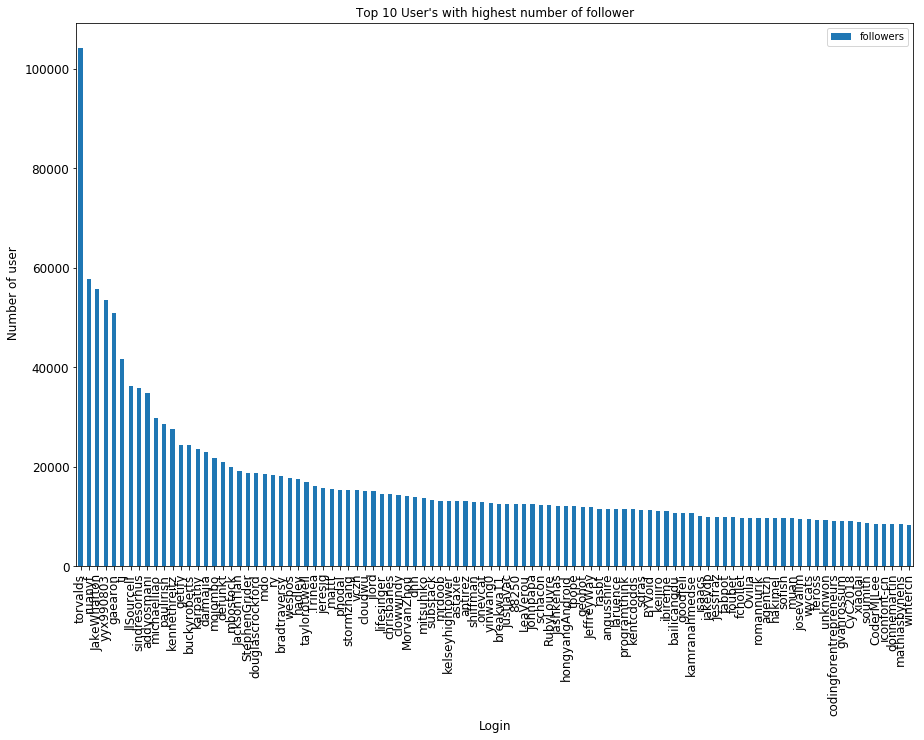

In [140]:
sorted_user_by_follower = full_user_detail.sort_values('followers', ascending=False)
ax = sorted_user_by_follower.head(100)[['followers']].plot(kind='bar', title ="Top 10 User's with highest number of follower", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xticklabels(sorted_user_by_follower.head(100)['login'])
ax.set_xlabel("Login", fontsize=12)
ax.set_ylabel(" Number of user", fontsize=12)
plt.show()

#### * The Above plot consist of 100 users with their follower count. 
#### * If we neglect the top 10 the remaining 90 users have almost same number of follower count

In [91]:
sorted_user_by_repo = full_user_detail.sort_values('public_repos', ascending=False)

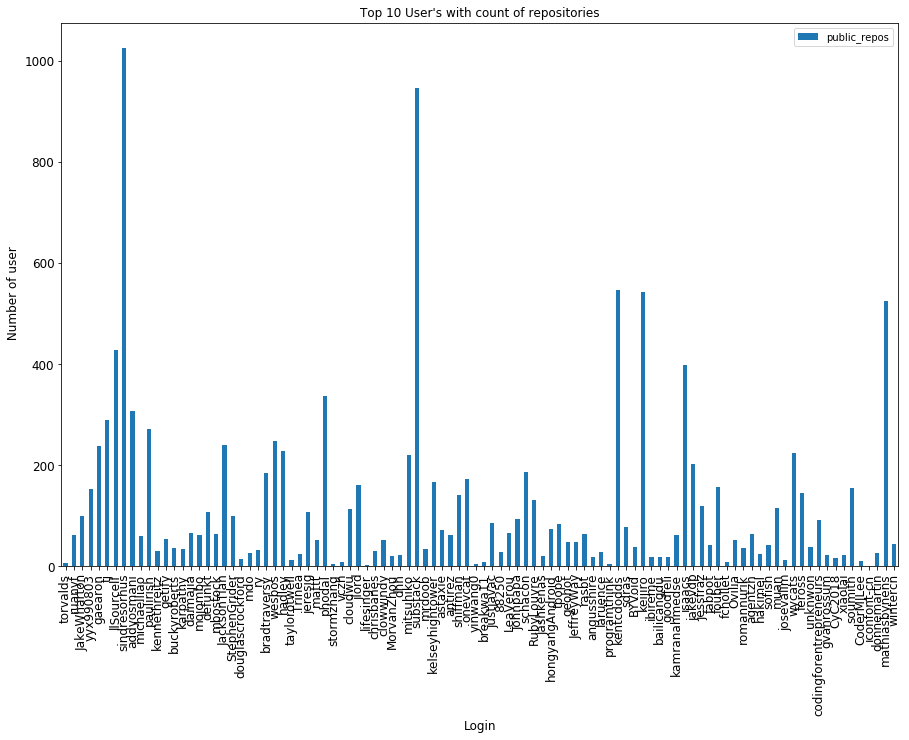

In [96]:
ax = sorted_user_by_follower.head(100)[['public_repos']].plot(kind='bar', title ="Top 10 User's with count of repositories", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xticklabels(sorted_user_by_follower.head(100)['login'])
ax.set_xlabel("Login", fontsize=12)
ax.set_ylabel(" Number of user", fontsize=12)
plt.show()

## Importing Excel chart

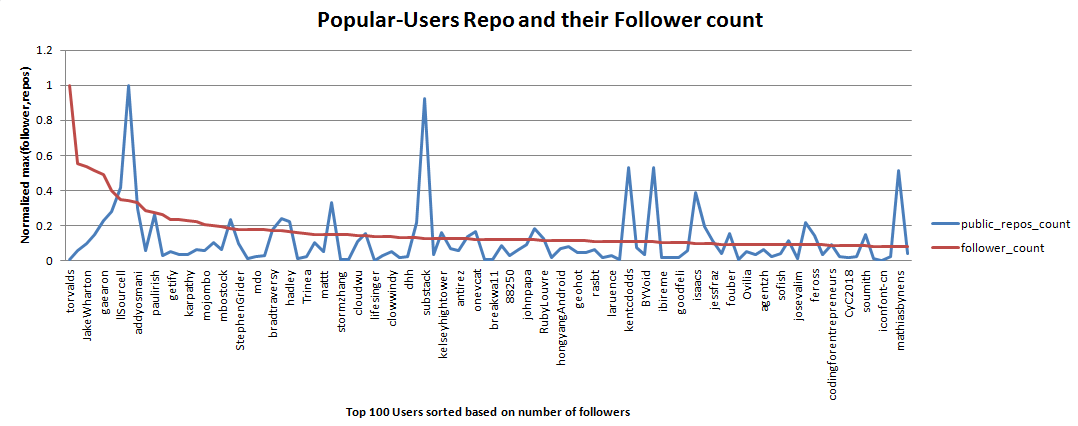

In [143]:
from IPython.display import Image
Image("user repo vs follower.png")

## Popular User's Following pattern

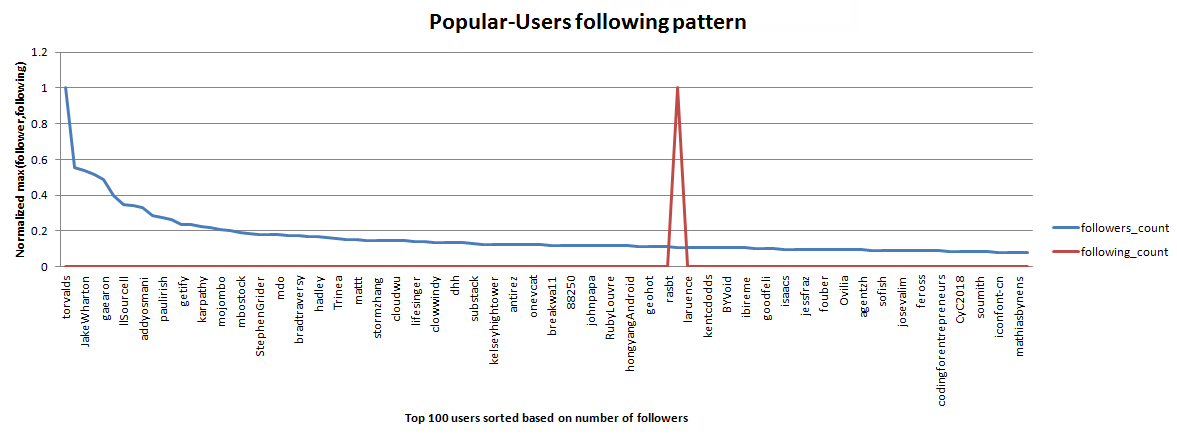

In [148]:
Image("user following pattern.png")

#### * Above graph explains the behaviour of following by popular user's on github.
#### * It clearly explains that most (influencer or popular) users don't follow a lot of users.

In [153]:
sorted_user_by_follower.columns

Index(['avatar_url', 'bio', 'blog', 'company', 'created_at', 'email',
       'events_url', 'followers', 'followers_url', 'following',
       'following_url', 'gists_url', 'gravatar_id', 'hireable', 'html_url',
       'id', 'location', 'login', 'name', 'node_id', 'organizations_url',
       'public_gists', 'public_repos', 'received_events_url', 'repos_url',
       'site_admin', 'starred_url', 'subscriptions_url', 'type', 'updated_at',
       'url'],
      dtype='object')

## Sorting Users by their joining date at GitHub (created_at)

In [240]:
full_user_detail['year'] = full_user_detail['created_at'].map(lambda x: int(x[0:4]))

In [244]:
sorted_user_by_follower = full_user_detail.sort_values('followers', ascending=False)
sorted_user_by_follower[['login','year']].head()

,login,year
0,torvalds,2011
1,ruanyf,2011
2,JakeWharton,2009
3,yyx990803,2010
4,gaearon,2011


In [243]:
sorted_user_by_follower[['login','year']].head(100).to_excel(r'File year.xlsx')

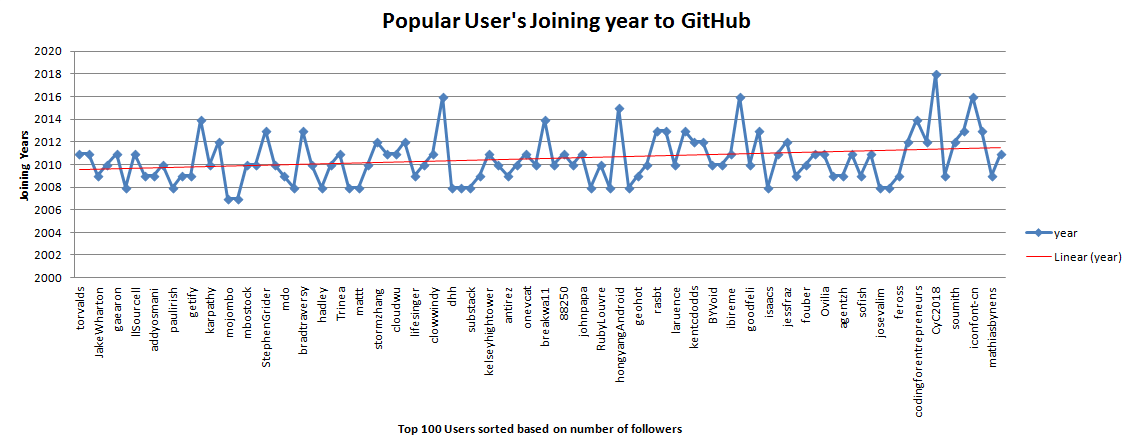

In [245]:
Image("user joining year.png")

#### * Git development began in April 2005, 14 years ago.
#### * This graph explains that many popular users joined GitHub at later years but still they became popular.
#### * 3 Users join in 2016 or 4 years ago and became popular.
#### * This concludes that for any user who wants to be an influencer on GitHub, it is not important to join no more than 2016 or 4 years ago.  

# Coding Language